##### Aldo Daniel Villaseñor Fierro
##### A01637907

In [2]:
import pandas as pd
import scipy.stats as stats
import pylab
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [3]:
df=pd.read_csv('mc-donalds-menu-1.csv',encoding = 'unicode_escape', engine ='python')

# 2. Analiza 2 de las siguientes variables en cuanto a sus datos atípicos y normalidad:ugars)

####     Calorias
####     Carbohidratos
####     Proteinas
####     Sodio
####     Azucares (Sugars)

In [4]:
q1_car = np.percentile(df['Carbohydrates'], 25)  
q3_car = np.percentile(df['Carbohydrates'], 75)  
ri_car = q3_car - q1_car  
print(q1_car)
print(q3_car)
print(ri_car)

30.0
60.0
30.0


In [5]:
q1_cal = np.percentile(df['Calories'], 25)  
q3_cal = np.percentile(df['Calories'], 75)  
ri_cal = q3_cal - q1_cal  
print(q1_cal)
print(q3_cal)
print(ri_cal)

210.0
500.0
290.0


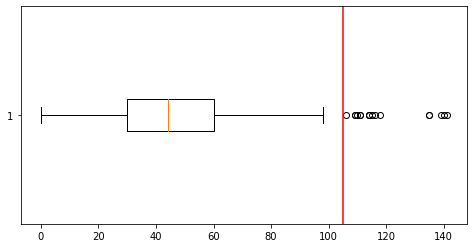

In [6]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['Carbohydrates'], vert=False)
plt.axvline(x=q3_car + 1.5 * ri_car, color="red")
plt.show()

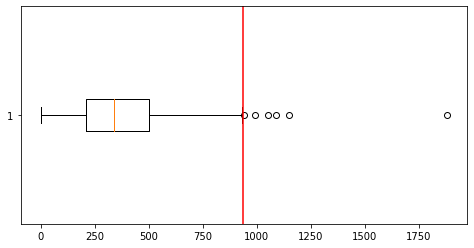

In [7]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['Calories'], vert=False)
plt.axvline(x=q3_cal + 1.5 * ri_cal, color="red")
plt.show()

### Eliminar valores mayores de 3 rangos intercuartílicos arriba de q3

In [8]:
df_car = df[(df['Carbohydrates'] < (q3_car + 1.5 * ri_car))]
df_cal = df[(df['Calories'] < (q3_cal + 1.5 * ri_cal))]

 # 3. Realiza pruebas de normalidad univariada de las variables (selecciona entre los métodos vistos en clase)

### Prueba de normalidad Anderson - Darling

In [9]:
stats.anderson(df_car['Carbohydrates'],dist = 'norm')

AndersonResult(statistic=0.7491741378365475, critical_values=array([0.567, 0.646, 0.775, 0.904, 1.075]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=42.275720164609055, scale=21.19162148767151)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [10]:
stats.anderson(df_cal['Calories'],dist = 'norm')

AndersonResult(statistic=0.8978551010141871, critical_values=array([0.567, 0.646, 0.775, 0.904, 1.075]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=349.01574803149606, scale=201.40125658540788)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

#### Para la variable carbohidratos podemos negar normalidad con un nivel significancia de $\alpha = 0.01$, $\alpha = 0.025$ y $\alpha = 0.05$. Mientras que para la variable calorias podemos negar normalidad con un nivel significancia de $\alpha = 0.01$ y $\alpha = 0.025$

In [11]:
stats.jarque_bera(df_car['Carbohydrates'])

SignificanceResult(statistic=0.08087590942674809, pvalue=0.9603687490172244)

In [12]:
stats.jarque_bera(df_cal['Calories'])

SignificanceResult(statistic=6.006505247684137, pvalue=0.04962539283964081)

## 4. Grafica los datos y su respectivo QQPlot para cada variable

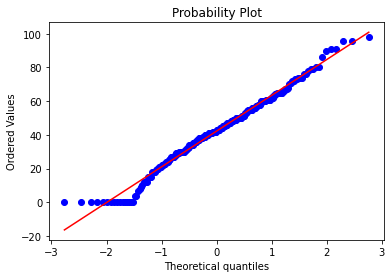

In [13]:
stats.probplot(df_car['Carbohydrates'], plot=pylab)
pylab.show()

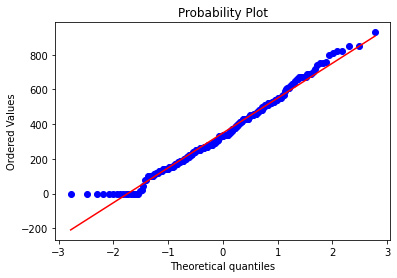

In [14]:
stats.probplot(df_cal['Calories'], plot=pylab)
pylab.show()

## 4. Calcula el coeficiente de sesgo y el coeficiente de curtosis de cada variable

### Sesgo, Curtosis, Media y Mediana de las variables

In [15]:
sesgo_c = stats.skew(df['Carbohydrates'])
curtosis_c = stats.kurtosis(df['Carbohydrates'])
print('Sesgo')
print(sesgo_c)
print('Curtosis')
print(curtosis_c)
print('Media')
print(df.Carbohydrates.mean())
print('Mediana')
print(df.Carbohydrates.median())

Sesgo
0.9074252822561677
Curtosis
1.3575379316182001
Media
47.34615384615385
Mediana
44.0


In [16]:
sesgo_c = stats.skew(df['Calories'])
curtosis_c = stats.kurtosis(df['Calories'])
print('Sesgo')
print(sesgo_c)
print('Curtosis')
print(curtosis_c)
print('Media')
print(df.Calories.mean())
print('Mediana')
print(df.Calories.median())

Sesgo
1.4441049105101538
Curtosis
5.645273870478668
Media
368.2692307692308
Mediana
340.0


## 5. Realiza el histograma y su distribución teórica de probabilidad 

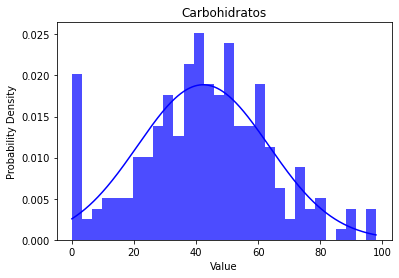

In [17]:
x = np.arange(min(df_car.Carbohydrates), max(df_car.Carbohydrates), 0.1)
serie=df_car.Carbohydrates
y = stats.norm.pdf(x, np.mean(serie), np.std(serie))
plt.figure(figsize=(6, 4))
plt.hist(serie, bins=30, density=True, histtype='bar', alpha=0.7, color='blue')
plt.plot(x, y, color='blue', label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Carbohidratos')
plt.show()

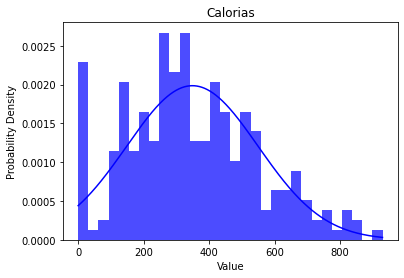

In [19]:
x = np.arange(min(df_cal.Calories), max(df_cal.Calories), 0.1)
serie=df_cal.Calories
y = stats.norm.pdf(x, np.mean(serie), np.std(serie))
plt.figure(figsize=(6, 4))
plt.hist(serie, bins=30, density=True, histtype='bar', alpha=0.7, color='blue')
plt.plot(x, y, color='blue', label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Calorias')
plt.show()

#### Analizando los gráficos QQPlot observamos un comportamiento normal en la parte central, en las colas notamos asímetría positiva lo cual se confirma al comparar la distribución normal teórica con el histograma de las variables.
#### Individualmente parece que la variable con mayor similitud a la normal es la variable carabohidratos, esto al observar los resultados de la Jarque - Bera, así como la media teoríca y la de la muestra las cuales parecen estar no muy alejadas.